<h1><center>TP 2 :  LINEAR REGRESSION MDI720</center></h1>

## Exercice 1:  
_(Analyse de la base de données “investment data”)_

La lecture d’un tutoriel pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html. Nous travaillons sur la base de données Investment Data Set1 qui peut être téléchargée depuis https://bitbucket.org/portierf/shared_files/downloads/invest.txt. Avant de commencer, on réalisera l’exercice 12 du polycopié : ”explicit formulas when p “1 for prediction intervals", se trouvant dans le chapitre 3 : “Confidence intervals and hypothesis testing”. On pourra aussi lire la section 3.1.1 de ce même chapitre du polycopié.

#### Imports :

In [46]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scs
from scipy.stats import t
import statsmodels.api as sm
import scipy.stats
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import warnings 
warnings.filterwarnings("ignore")

### Question 1:
Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [47]:
df = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = " ")
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


In [48]:
# Définition de x et de y comme étant respectivement la colonne 'gnp' et 'invest' de la dataframe. Le nombre 
# d'éléments dans l'échantillon est noté n.
x = df['gnp']
y = df['invest']
n = len(x)

### Question 2:
Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

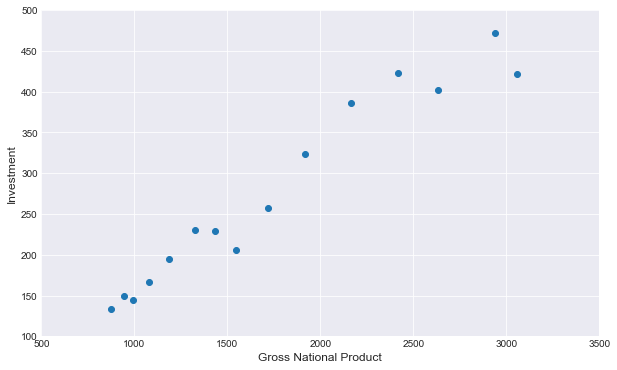

In [49]:
# Graph de la courbe du GNP en fonction de l'investissement. 
plt.figure(figsize=(10, 6))
plt.plot(x, y,"o")
plt.xlabel('Gross National Product', fontsize = 12)
plt.ylabel('Investment', fontsize = 12)
plt.xlim(500,3500)
plt.ylim(100,500)
plt.show()
sns.set_style("darkgrid")

In [50]:
# Transformations des variables à l'échelle logarithmique.
x = np.log(x) 
y = np.log(y)

### Question 3: 
Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté:$$ \hat\theta_n\in\mathbb{R}^2$$

D'après l'exercice 12 : 
$$\hat\beta_0 = \overline{y}_n - \overline{x}_n\hat\beta_1$$

$$\hat\beta_1 = \frac{\sum_{i=1}^n(x_i-\overline{x}_n)(y_i-\overline{y}_n)}{\sum_{i=1}^n(x_i-\overline{x}_n)^2}$$ 

In [51]:
# Calcul des moyennes de x et y.
y_m = y.mean()
x_m = x.mean()

# Calcul de l'intercept beta0 et de la pente beta1.
beta1 = ((x - x_m) * (y - y_m)).sum() / np.dot((x - x_m),np.transpose(x - x_m))
beta0 = y_m - beta1 * x_m
print(f"Régression linéaire de 'Investment' sur le'GNP':")
print(f"- l'intercept est égale à : {round(beta0, 3)}.")
print(f"- la pente est égale à : {round(beta1, 3)}.")

Régression linéaire de 'Investment' sur le'GNP':
- l'intercept est égale à : -1.964.
- la pente est égale à : 1.015.


In [52]:
#On peut désormais définir notre estimateur:
yE = beta0 + beta1 * x

#Estimation de l'écart-type s2:  
s2 = np.dot((y - yE), np.transpose(y - yE))/(n-2) 
print(f"L'estimateur de l'écart-type s2 vaut: {round(s2, 2)}.")

L'estimateur de l'écart-type s2 vaut: 0.01.


In [53]:
#A partir de s2 on calcul les écart-types de beta0 et de beta1.
v_B0 = s2 * ((1/n) + ((x_m**2)/np.dot((x - x_m),np.transpose(x - x_m)))) 
v_B1 = s2 / np.dot((x - x_m),np.transpose(x - x_m))
print(f"La variance de Beta0 vaut: {round(v_B0, 2)}.")
print(f"La variance de Beta1 vaut: {round(v_B1, 2)}.")

La variance de Beta0 vaut: 0.17.
La variance de Beta1 vaut: 0.0.


In [54]:
#A partir des variances on calcule les écart-types de beta0 et de beta1.
std_B0 = np.sqrt(v_B0) 
std_B1 = np.sqrt(v_B1)
print(f"L'écart-type de Beta0 vaut: {round(std_B0, 2)}.")
print(f"L'écart-type de Beta1 vaut: {round(std_B1, 2)}.")
beta = np.matrix([beta0, beta1])
beta = beta.reshape(2, 1)

L'écart-type de Beta0 vaut: 0.41.
L'écart-type de Beta1 vaut: 0.06.


In [55]:
# Calcul du coefficient de détermination R2:
r2 = np.dot((yE - y_m),np.transpose(yE - y_m)) / np.dot((y - y_m),np.transpose(y - y_m))
print(f"Coefficient de détermination R2: {round(r2, 2)}.")

Coefficient de détermination R2: 0.96.


### Question 4:
La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student (t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

On fait un test de Student à 95% bilatéral
$$H0 :\beta_1 = 0$$
$$H1 : \beta_1 \ne 0$$

In [56]:
# Le test étant à 95% alpha vaut donc 5%.
alpha = 0.05

# Calcul de la statistique de student:
stat_student = beta1 / std_B1
print(f"La statistique de student vaut: {round(stat_student, 2)}")

# Calcul de la p-valeur: 
p_value = 2*(1- scs.t.cdf(np.abs(stat_student), (n - 2)))
print(f"La p-valeur vaut: {round(p_value, 2)}")

# Degré de liberté:
ddl = n - 2

# Calcul du quantile:
quantile_student = t.ppf(1 - alpha/2, df=ddl)

# Calcul de la p-value: 
pvalue = 2*(1 - t.cdf(stat_student, df = ddl)) 
print(f"Statistiques de student = {round(stat_student, 2)}")
print(f"Quantile = {round(quantile_student, 2)}")

La statistique de student vaut: 18.33
La p-valeur vaut: 0.0
Statistiques de student = 18.33
Quantile = 2.16


In [57]:
#Interprétation des tests:
def testStudent(stat, quantile): 
    if np.abs(stat) >= quantile: 
        print("La statistique de Student est supérieur au quantile")
        return True
    else: 
        print("La statistique de Student est inférieur au quantile.") 
        return False        

def testpvalue(alpha, pvalue):
    if pvalue < alpha: 
        print("La p-valeur est inférieur à alpha.")
        return True
    else: 
        print("La p-valeur est supérieur à alpha.") 
        return False
        
def hypothese(boolean):
    if(boolean):
        print("On rejette l'hypothèse.")
    else:
        print("On ne rejette pas l'hypothèse.")
        
hypothese(testStudent(stat_student, quantile_student))
hypothese(testpvalue(alpha, pvalue))
print("L'hypothèse que la pente soit égale à 0 est rejettée donc on peut en conclure que la pente est significative.")

La statistique de Student est supérieur au quantile
On rejette l'hypothèse.
La p-valeur est inférieur à alpha.
On rejette l'hypothèse.
L'hypothèse que la pente soit égale à 0 est rejettée donc on peut en conclure que la pente est significative.


### Question 5:
Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau
90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CI(x) et PI(x), respectivement.

In [58]:
# Création de la matrice X.
x1 = np.array([1, np.log(1000)])
ones = np.ones(15)
X = np.c_[ones, x]
invGram = np.linalg.inv(np.dot(X.T,X))
diag = np.diag(X.dot(invGram).dot(np.transpose(X)))
res = np.dot(X, beta)
res = np.asarray(res).reshape(-1)

# Prédiction de l'instissement avec le modèle précédent et un GNP égale à 1000.
x0 = np.log(1000)
y0 = beta0 + beta1 * x0
pred = np.exp(y0)
print(f"La prédiction pour un GNP de 1000 est égale à: {round(pred,2)}")

La prédiction pour un GNP de 1000 est égale à: 155.98


In [59]:
# Quantile Student à 90% 
quantile_student_90 = t.ppf(1 - 0.1/2, df=ddl)
Z = np.dot(np.dot(x1.T,invGram),x1)

# Calcul de l'intervalle de confiance pour la valeur prédite.    
CI_min = y0 - quantile_student_90 * np.sqrt(s2 * Z)
CI_max = y0 + quantile_student_90 * np.sqrt(s2 * Z)
print(f"L'intervalle de confiance est : [{round(np.exp(CI_min), 3)} , {round(np.exp(CI_max), 3)}]")

# Calcul de l'intervalle de prédiction pour la valeur prédite.
PI_min = y0 - quantile_student_90 * np.sqrt(s2*(1 + Z))
PI_max = y0 + quantile_student_90 * np.sqrt(s2*(1 + Z))
print(f"L'intervalle de prédiction est : [{round(np.exp(PI_min),3)}, {round(np.exp(PI_max), 3)}]")

# Calcul des vecteurs pour le traçage du graph.
CIminf = res - quantile_student_90 * np.sqrt(s2 * diag)
CImaxf = res +  quantile_student_90 * np.sqrt(s2 * diag)

PIminf = res - quantile_student_90 * np.sqrt(s2*(1 + diag))
PImaxf = res + quantile_student_90 * np.sqrt(s2*(1 + diag))

L'intervalle de confiance est : [146.676 , 165.873]
L'intervalle de prédiction est : [132.002, 184.312]


### Question 6:
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

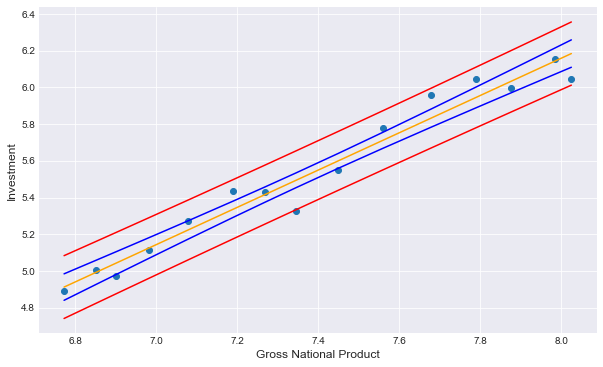

In [60]:
# Graph de la courbe du GNP en fonction de l'investissement. 
plt.figure(figsize=(10, 6))
plt.plot(x, y,"o")
plt.plot(x, yE,"orange")
# Intervalles de confiances en bleue.
plt.plot(x, CIminf, "blue")
plt.plot(x, CImaxf, "blue")
# Intervalles de prédiction en rouges.
plt.plot(x, PIminf, "red")
plt.plot(x, PImaxf, "red")
plt.xlabel('Gross National Product', fontsize = 12)
plt.ylabel('Investment', fontsize = 12)
plt.show()
sns.set_style("darkgrid")

### Question 7:
En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 100. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [61]:
# Vérification pour : pente, intercept, R², écart types, pvalues
X_sm = sm.add_constant(x)
ols = sm.OLS(y, X_sm)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 invest   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     336.1
Date:                Thu, 18 Oct 2018   Prob (F-statistic):           1.14e-10
Time:                        19:10:01   Log-Likelihood:                 16.311
No. Observations:                  15   AIC:                            -28.62
Df Residuals:                      13   BIC:                            -27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9636      0.410     -4.795      0.0

### Question 8:
Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 100 (on donnera à ce point une couleur différente).

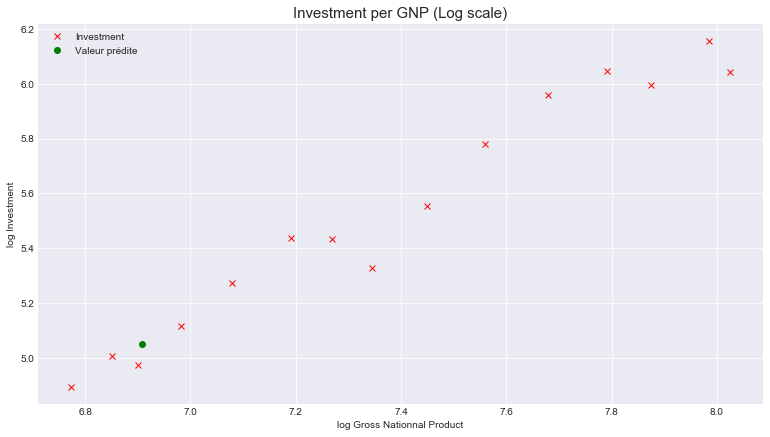

In [62]:
ones = np.ones(n).reshape(n,1)
Xt_mat = x.values.reshape(n,1)
Xnew = np.matrix([[1],[x0]])
X_mat = np.concatenate([ones,Xt_mat],axis=1)
model=linear_model.LinearRegression(fit_intercept=False).fit(X_mat,y)
y_model_pred=model.predict(Xnew.reshape(1,2))[0]

# Graph de la courbe du GNP en fonction de l'investissement. 
plt.figure(figsize=(13,7))
plt.plot(x, y,"rx")
plt.plot(x0, y_model_pred,"go")

plt.title("Investment per GNP (Log scale)", fontsize = 15)
plt.xlabel("log Gross Nationnal Product")
plt.ylabel("log Investment")
plt.legend(("Investment","Valeur prédite","Droite de régression"))
plt.show()

### Question 9:
Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de rang plein ?

In [63]:
interest = df['interest']
X1 = np.c_[ones, x, interest]
gram = (np.dot(X1.T, X1))
np.linalg.inv(gram)
X1_rank = np.linalg.matrix_rank(gram)
print(f"L'inverse de la matrice de gram existe donc elle est de plein rang (ici = {X1_rank}).")
print(f"L'une des valeurs propre est très faible, ce qui peut laisser entendre une dépendance linéaire entre nos variables")

L'inverse de la matrice de gram existe donc elle est de plein rang (ici = 3).
L'une des valeurs propre est très faible, ce qui peut laisser entendre une dépendance linéaire entre nos variables


### Question 10:
Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.

_On teste avec Student :_

$H_0 : \beta_j = 0 $ $(j = \{0, 1, 2\})$

$H_1 : \beta_j \ne 0$

In [64]:
# Calcul des coefficients :
beta = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y)
print(f"Les coefficients sont : {beta}.")

# Notre nouveau modèle:
yE2 = np.dot(X1, beta)

# Calcul des écarts types : 
u = (y - np.dot(X1, beta))
SD = (1/(n-3)) * np.dot(u.T, u) # divise par n-k-1 ie n-2-1
var2 = SD * np.linalg.inv(gram)
SE = np.sqrt(np.diag(var2))
print(f"Les écart-types sont : {SE}.")

# Calcul du coefficient de détermination 
y2_hat = np.dot(X1, beta)
R22 = 1 - (sum((y - y2_hat)**2))/(sum((y - y_m)**2))
print(f"Coefficient de détermination vaut : {round(R22, 3)}")

def decision_rule_test(t_stat, a): 
    quantile = t.ppf(1 - a/2, df=ddl)
    if t_stat > quantile: 
        print(f"Statistiques de student = {round(t_stat, 2)} \n Quantile = {round(quantile_student, 2)}\n On rejette H0.")
    else: 
        print(f"Statistiques de student = {round(t_stat, 2)} \n Quantile = {round(quantile_student, 2)}\n On ne rejette pas H0.")

def decision_rule_pvalue(t_stat, a):
    pvalue = 2*(1 - t.cdf(t_stat,df = n-3))
    if pvalue < a: 
        print(f"La p-valeur est : {round(pvalue,3)} \n On rejette H0.")
    else: 
        print(f"La p-valeur est : {round(pvalue,3)} \n On ne rejette pas H0.")

# Tests
def tstat():
    stat = []
    for i in range(3):
        stat.append(abs(beta[i]/SE[i]))
    return(stat)
        
tstat2 = tstat()

for i in range(3):
    print("---------------------------------------")
    print("Test pour beta" + str(i))
    decision_rule_test(tstat2[i], 0.05)
    decision_rule_pvalue(tstat2[i], 0.05)


Les coefficients sont : [-2.18045473  1.05124269 -0.00652888].
Les écart-types sont : [0.6623992  0.10206138 0.01534421].
Coefficient de détermination vaut : 0.963
---------------------------------------
Test pour beta0
Statistiques de student = 3.29 
 Quantile = 2.16
 On rejette H0.
La p-valeur est : 0.006 
 On rejette H0.
---------------------------------------
Test pour beta1
Statistiques de student = 10.3 
 Quantile = 2.16
 On rejette H0.
La p-valeur est : 0.0 
 On rejette H0.
---------------------------------------
Test pour beta2
Statistiques de student = 0.43 
 Quantile = 2.16
 On ne rejette pas H0.
La p-valeur est : 0.678 
 On ne rejette pas H0.


Les tests de significativité montrent qu'il faudrait exclure la variable "interest" du modèle puisque le test de de nullité de b2 n'est pas rejetté. Il faudrait faire un test de significativité jointe tel que le F-test pour confirmer la déduction. 

### Question 11: 
Pour les valeurs de GNP 1000 et interest 10, i.e., x =(1,1000,10).T, prédire log(investment) et donner les intervalles de confiance CI(x) et PI(x) au niveau 99.9%.

In [65]:
X1000 = np.array([1, np.log(1000), 10])
y_pred = float((beta[0]*X1000[0] + beta[1] * X1000[1] + beta[2] * X1000[2]) + np.random.normal(0,s2))

#Intervalle de confiance
X1000 = np.asmatrix(X1000)
sigma_pred = math.sqrt(s2*(1 + np.matmul(np.matmul(X1000, np.linalg.inv(gram)),X1000.T)))
sigma_ci = math.sqrt(s2*(np.matmul(np.matmul(X1000, np.linalg.inv(gram)),X1000.T)))

q99 = t.ppf(0.999,len(y)-3)
CI_min = y_pred - q99 * sigma_ci
CI_max = y_pred + q99 * sigma_ci
CI_min_yE = yE2 - q99 * sigma_ci
CI_max_yE = yE2 + q99 * sigma_ci
PI_min = y_pred - q99 * sigma_pred
PI_max = y_pred + q99 * sigma_pred
PI_min_yE = yE2 - q99 * sigma_pred
PI_max_yE = yE2 + q99 * sigma_pred
print (f"Valeur prédite : {round(y_pred, 2)}.")
print (f"Intervalle de confiance autour de la valeur prédite = [{round(np.exp(CI_min), 3)}, {round(np.exp(CI_max), 3)}].")
print (f"Intervalle de prediction autour de la valeur prédite = [{round(np.exp(PI_min), 3)} , {round(np.exp(PI_max), 3)}].")

Valeur prédite : 5.01.
Intervalle de confiance autour de la valeur prédite = [108.097, 209.592].
Intervalle de prediction autour de la valeur prédite = [93.359 , 242.679].


### Question 12:
Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, andv log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9%(ces surfaces seront tracées sur le domaine de définition des données).

Text(0.5,0,'log Invest')

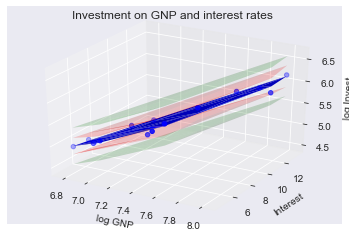

In [66]:
fig = plt.figure()

def ci_graph(ypred, X, x_new, variance, a):
    q = t.ppf(1 - a/2, df=ddl)
    gram = np.linalg.inv(np.dot(X.T,X))
    matrix = np.diag(np.dot(np.dot(x_new.T,gram),x_new))
    ci_min = ypred - q * np.sqrt(variance * matrix)
    ci_max = ypred + q * np.sqrt(variance * matrix)
    return ci_min, ci_max

def pi_graph(ypred, X, x_new, variance, a):
    q = t.ppf(1 - a/2, df=ddl)
    gram = np.linalg.inv(np.dot(X.T,X))
    matrix = np.diag(np.dot(np.dot(x_new.T,gram),x_new))
    pi_min = ypred - q * np.sqrt(variance * (1 + matrix))
    pi_max = ypred + q * np.sqrt(variance * (1 + matrix))
    return pi_min, pi_max

# Variables 
Y_reg = np.dot(X1, beta)
ci_3D = ci_graph(Y_reg, X1, X1.T, SD, 0.001)
pi_3D = pi_graph(Y_reg, X1, X1.T, SD, 0.001)

# La grille pour le plot 3D
ax = fig.add_subplot(111, projection='3d')

# Plot scatter
ax.scatter(X1.T[:][1], X1.T[:][2], y, zdir='X1.T[:][0]', c = 'b', marker = 'o')

# Plot regression plan 
ax.plot_trisurf(X1.T[:][1], X1.T[:][2], Y_reg, color = "blue", label="Linear Regression")
ax.plot_trisurf(X1.T[:][1], X1.T[:][2], ci_3D[0], color = "red", label="ci_min", alpha = 0.2)
ax.plot_trisurf(X1.T[:][1], X1.T[:][2], ci_3D[1], color = "red", label="ci_max", alpha = 0.2)
ax.plot_trisurf(X1.T[:][1], X1.T[:][2], pi_3D[0], color = "green", label="pi_min", alpha = 0.2)
ax.plot_trisurf(X1.T[:][1], X1.T[:][2], pi_3D[1], color = "green", label="pi_max", alpha = 0.2)
ax.set_title("Investment on GNP and interest rates ")
ax.set_xlabel("log GNP")
ax.set_ylabel("Interest")
ax.set_zlabel("log Invest")

### Question 13:
En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 100 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [67]:
ols2 = sm.OLS(y, X1)
ols_result2 = ols2.fit()
ypred2_2 = ols_result2.predict(X1000)
print(ols_result2.summary())
print(f"Le Y prédit est {ypred2_2}")

                            OLS Regression Results                            
Dep. Variable:                 invest   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     157.5
Date:                Thu, 18 Oct 2018   Prob (F-statistic):           2.44e-09
Time:                        19:10:04   Log-Likelihood:                 16.424
No. Observations:                  15   AIC:                            -26.85
Df Residuals:                      12   BIC:                            -24.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1805      0.662     -3.292      0.0